In [987]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [988]:
df = pd.read_csv('HREP/crawled.csv')
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms,bathrooms
0,4.1 Tỷ,39 m²,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4 tầng,NaN,4 Phòng ngủ,3 WC
1,4 Tỷ,40 m²,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4 tầng,NaN,4 Phòng ngủ,4 WC
2,13.8 Tỷ,70 m²,Nhà mặt phố,Quận Hà Đông,Đường vào: Rộng 8m,Mặt tiền: 4.5m,4 tầng,1 Chỗ để ôtô,4 Phòng ngủ,3 WC
3,138 Tỷ,230 m²,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,NaN,NaN,NaN
4,10.9 Tỷ,57 m²,Nhà mặt phố,Quận Hoàng Mai,NaN,Mặt tiền: 5m,4 tầng,NaN,NaN,NaN


In [989]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20088 entries, 0 to 20087
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   price          19513 non-null  object
 1   area           20088 non-null  object
 2   type           20088 non-null  object
 3   district       19487 non-null  object
 4   road_width     14026 non-null  object
 5   width          15186 non-null  object
 6   floors         16904 non-null  object
 7   parking_slots  5747 non-null   object
 8   bedrooms       14588 non-null  object
 9   bathrooms      12561 non-null  object
dtypes: object(10)
memory usage: 1.5+ MB


In [990]:
df.drop(columns='bathrooms', inplace=True)

In [991]:
def fix_price(x):
    try:
        x = x.split()
        if x[1] == 'Tỷ':
            return round(float(x[0]), 2)
        elif x[1] == 'Triệu':
            return round(float(x[0]) / 1000, 2)
    except:
        return None

df['price'] = df['price'].apply(fix_price)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms
0,4.1,39 m²,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4 tầng,NaN,4 Phòng ngủ
1,4.0,40 m²,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4 tầng,NaN,4 Phòng ngủ
2,13.8,70 m²,Nhà mặt phố,Quận Hà Đông,Đường vào: Rộng 8m,Mặt tiền: 4.5m,4 tầng,1 Chỗ để ôtô,4 Phòng ngủ
3,138.0,230 m²,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,NaN,NaN
4,10.9,57 m²,Nhà mặt phố,Quận Hoàng Mai,NaN,Mặt tiền: 5m,4 tầng,NaN,NaN


In [992]:
df['area'] = df['area'].apply(lambda x: float(x.split()[0]))

In [993]:
def fix_width(x):
    try:
        return float(x.split()[-1][:-1])
    except:
        return None
            
df['road_width'] = df['road_width'].apply(str).apply(fix_width)
df['width'] = df['width'].apply(str).apply(fix_width)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms
0,4.1,39.0,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4 tầng,NaN,4 Phòng ngủ
1,4.0,40.0,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4 tầng,NaN,4 Phòng ngủ
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4 tầng,1 Chỗ để ôtô,4 Phòng ngủ
3,138.0,230.0,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,NaN,NaN
4,10.9,57.0,Nhà mặt phố,Quận Hoàng Mai,NaN,5.0,4 tầng,NaN,NaN


In [994]:
def fix_floors(x):
    try:
        try:
            return int(x.split()[0])
        except:
            return int(float(x.split()[0]) + 0.5)
    except:
        return None
    
df['floors'] = df['floors'].apply(fix_floors)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms
0,4.1,39.0,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4.0,NaN,4 Phòng ngủ
1,4.0,40.0,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4.0,NaN,4 Phòng ngủ
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4.0,1 Chỗ để ôtô,4 Phòng ngủ
3,138.0,230.0,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,NaN,NaN
4,10.9,57.0,Nhà mặt phố,Quận Hoàng Mai,NaN,5.0,4.0,NaN,NaN


In [995]:
def fix_parking(x):
    try:
        return int(x.split()[0])
    except:
        return 0
    
df['parking_slots'] = df['parking_slots'].apply(fix_parking)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms
0,4.1,39.0,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4.0,0,4 Phòng ngủ
1,4.0,40.0,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4.0,0,4 Phòng ngủ
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4.0,1,4 Phòng ngủ
3,138.0,230.0,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,0,NaN
4,10.9,57.0,Nhà mặt phố,Quận Hoàng Mai,NaN,5.0,4.0,0,NaN


In [996]:
def fix_rooms(x):
    try:
        return int(x.split()[0])
    except:
        return None

df['bedrooms'] = df['bedrooms'].apply(fix_rooms)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms
0,4.1,39.0,Nhà trong ngõ,Quận Hoàng Mai,NaN,NaN,4.0,0,4.0
1,4.0,40.0,Nhà trong ngõ,Quận Tây Hồ,NaN,NaN,4.0,0,4.0
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4.0,1,4.0
3,138.0,230.0,Nhà mặt phố,Quận Hoàn Kiếm,NaN,NaN,NaN,0,NaN
4,10.9,57.0,Nhà mặt phố,Quận Hoàng Mai,NaN,5.0,4.0,0,NaN


In [998]:
df = df[(df['price'] >= 0.5) & (df['price'] <= 100)]
df = df[(df['area'] >= 10) & (df['area'] <= 200)]
df = df[(df['road_width'] >= 0.5) & (df['road_width'] <= 40)]
df = df[(df['width'] >= 2) & (df['width'] <= 15)]
df = df[(df['floors'] >= 0) & (df['floors'] <= 10)]
df = df[(df['parking_slots'] >= 0) & (df['parking_slots'] <= 5)]
df = df[(df['bedrooms'] >= 1) & (df['bedrooms'] <= 20)]

In [999]:
df_no_nan = df.dropna()
test_df = df_no_nan.sample(n=1000, random_state=42)
test_df

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms
14035,26.00,100.0,Nhà mặt phố,Quận Nam Từ Liêm,10.0,10.0,8.0,0,4.0
12069,13.50,55.0,Nhà mặt phố,Quận Cầu Giấy,6.0,4.0,4.0,0,4.0
17188,6.20,43.0,Nhà trong ngõ,Quận Hoàng Mai,8.0,9.0,3.0,2,3.0
5474,15.60,86.0,Nhà trong ngõ,Quận Hai Bà Trưng,6.0,4.5,7.0,4,4.0
17379,3.50,42.0,Nhà trong ngõ,Quận Long Biên,3.5,3.8,5.0,0,4.0
...,...,...,...,...,...,...,...,...,...
14511,5.50,107.0,Nhà trong ngõ,Quận Nam Từ Liêm,3.0,5.5,4.0,0,4.0
8465,1.80,38.0,Nhà trong ngõ,Quận Hoàng Mai,3.0,4.0,3.0,0,4.0
10030,4.25,33.0,Nhà trong ngõ,Quận Đống Đa,2.0,3.9,5.0,0,3.0
7071,70.00,45.0,Nhà mặt phố,Quận Đống Đa,20.0,4.0,5.0,1,6.0


In [1000]:
mean_road_width_by_type = df.groupby('type')['road_width'].transform('mean').round(1)
df['road_width'].fillna(mean_road_width_by_type, inplace=True)

In [1001]:
mean_width = df['width'].mean().round(1)
df['width'].fillna(mean_width, inplace=True)

In [1002]:
mode_floors = df['floors'].mode()[0]
df['floors'].fillna(mode_floors, inplace=True)

In [1003]:
mode_bedrooms_by_floors = df.groupby('floors')['bedrooms'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
df['bedrooms'].fillna(mode_bedrooms_by_floors, inplace=True)

In [1004]:
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4.0,1,4.0
5,2.6,28.0,Nhà trong ngõ,Quận Đống Đa,2.5,3.2,4.0,0,3.0
6,7.8,33.0,Nhà mặt phố,Quận Thanh Xuân,6.0,3.5,4.0,0,3.0
7,7.3,36.0,Nhà mặt phố,Quận Thanh Xuân,6.0,4.5,3.0,0,2.0
10,21.0,80.0,Nhà mặt phố,Quận Hai Bà Trưng,6.0,6.0,6.0,0,6.0


In [1005]:
df.isnull().sum()

price              0
area               0
type               0
district         305
road_width         0
width              0
floors             0
parking_slots      0
bedrooms           0
dtype: int64

In [1006]:
df.describe()

,price,area,road_width,width,floors,parking_slots,bedrooms
count,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000,10308.000000
mean,11.260340,57.537767,7.620797,4.810670,4.769305,0.922778,4.519402
std,12.661063,29.672206,7.690633,1.621897,1.428799,1.397115,2.128890
min,0.500000,12.000000,1.000000,2.000000,1.000000,0.000000,1.000000
25%,4.000000,38.000000,3.000000,4.000000,4.000000,0.000000,3.000000
50%,6.500000,50.000000,4.000000,4.300000,5.000000,0.000000,4.000000
75%,13.200000,66.000000,8.000000,5.000000,5.000000,1.000000,5.000000
max,100.000000,200.000000,40.000000,15.000000,10.000000,5.000000,17.000000


In [1007]:
df.dropna(inplace=True)
df.head()

,price,area,type,district,road_width,width,floors,parking_slots,bedrooms
2,13.8,70.0,Nhà mặt phố,Quận Hà Đông,8.0,4.5,4.0,1,4.0
5,2.6,28.0,Nhà trong ngõ,Quận Đống Đa,2.5,3.2,4.0,0,3.0
6,7.8,33.0,Nhà mặt phố,Quận Thanh Xuân,6.0,3.5,4.0,0,3.0
7,7.3,36.0,Nhà mặt phố,Quận Thanh Xuân,6.0,4.5,3.0,0,2.0
10,21.0,80.0,Nhà mặt phố,Quận Hai Bà Trưng,6.0,6.0,6.0,0,6.0


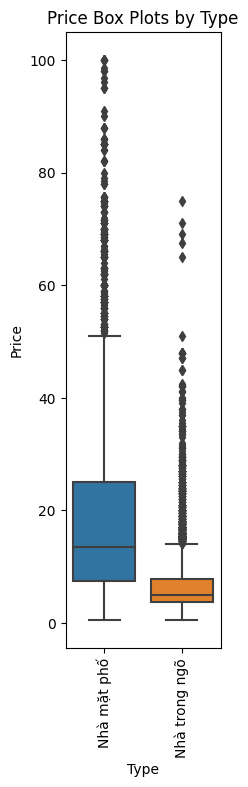

In [1008]:
plt.figure(figsize=(2, 8))

sns.boxplot(data=df, x='type', y='price')
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Price Box Plots by Type')
plt.xticks(rotation=90)  
plt.show()

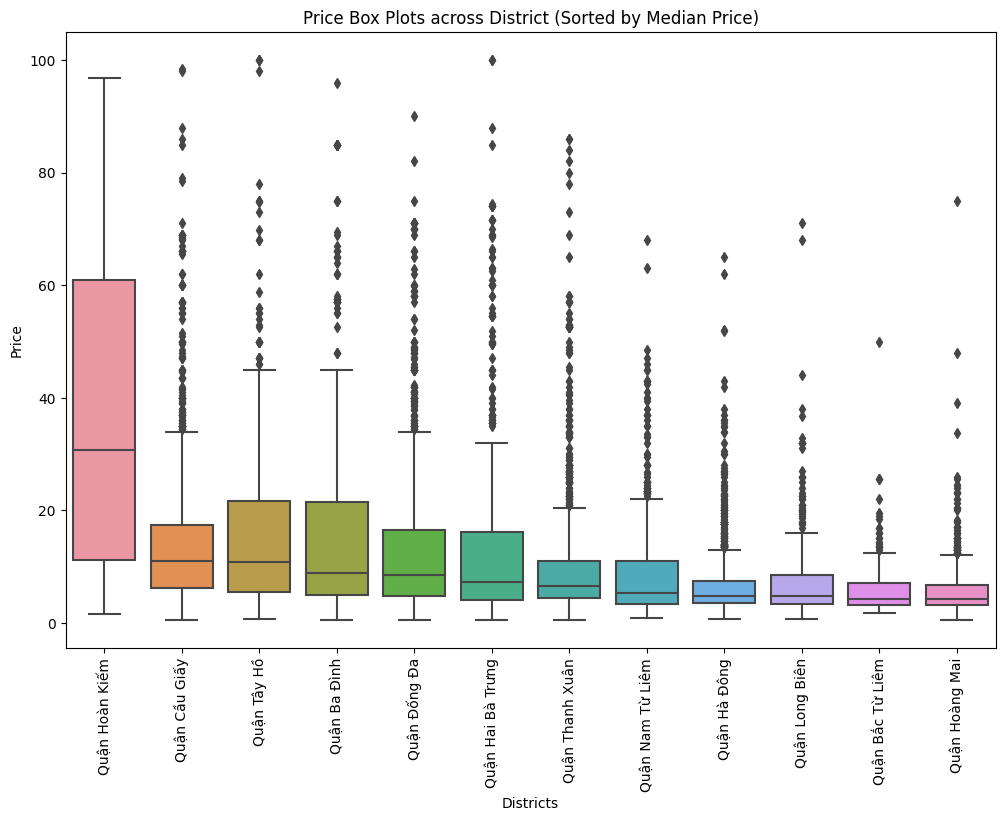

In [1009]:
median_prices = df.groupby('district')['price'].median().sort_values(ascending=False)

df['district'] = pd.Categorical(df['district'], categories=median_prices.index, ordered=True)
df_sorted = df.sort_values('district')

plt.figure(figsize=(12, 8))

sns.boxplot(data=df_sorted, x='district', y='price')
plt.xlabel('Districts')
plt.ylabel('Price')
plt.title('Price Box Plots across District (Sorted by Median Price)')
plt.xticks(rotation=90)  
plt.show()

In [1010]:
encoding = {
    'Nhà trong ngõ': 0,
    'Nhà mặt phố': 1
}

df['type'] = df['type'].map(encoding)
df = pd.get_dummies(df, columns=['district'], drop_first=True)

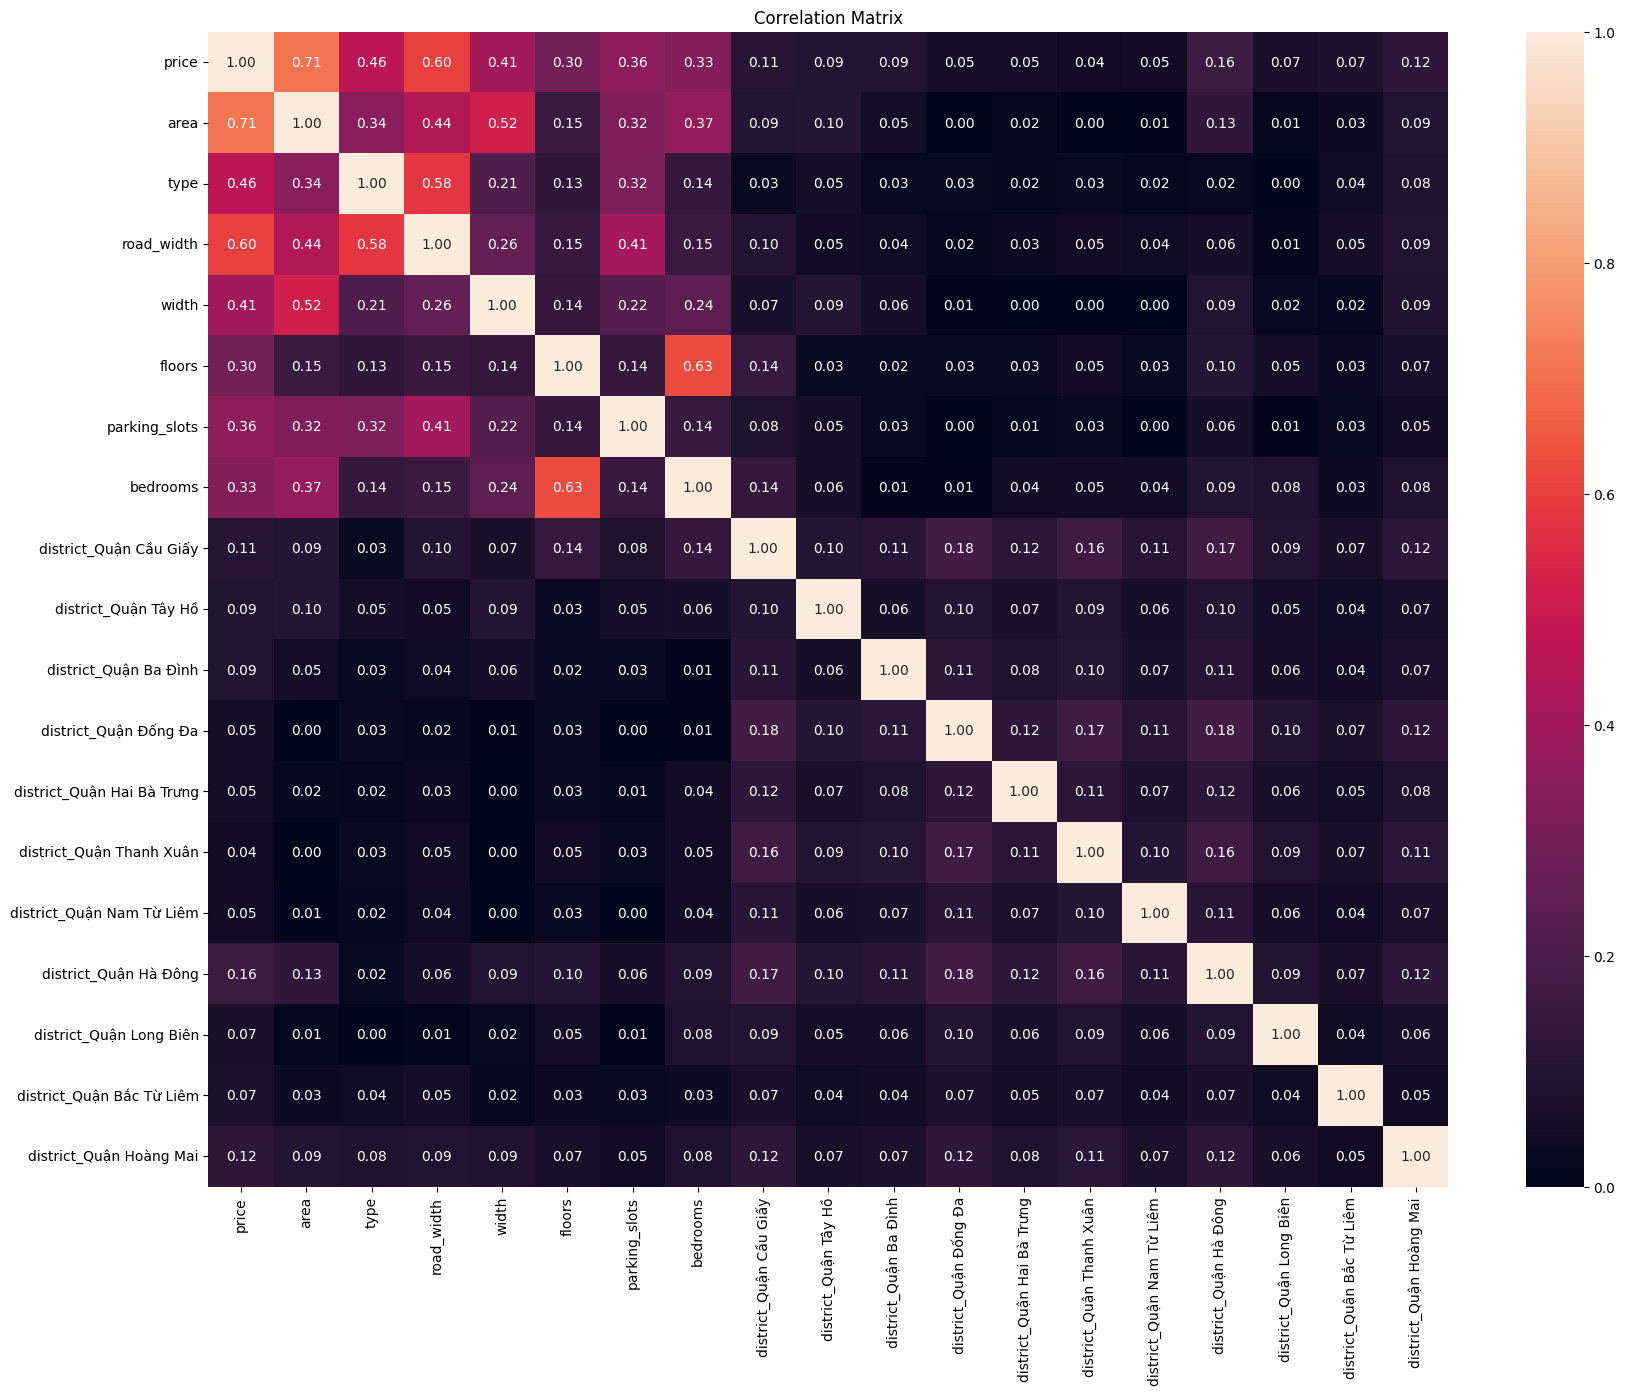

In [1012]:
correlation_matrix = abs(df.corr())

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 10}, fmt='.2f', vmin=0, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [1013]:
test_mask = df.index.isin(test_df.index)

train = df[~test_mask]
test = df[test_mask]

In [1014]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)